### Load Modules

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
!pip install opencv-python

### Prepare/collect data

In [80]:
import os
os.sys.path

path = os.listdir('brain_tumor/Training/')
classes = {'no_disease':0, 'pituitary_tumor':1, 'moderate_alzheimer': 2}

In [81]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [82]:
X = np.array(X)
Y = np.array(Y)
X_updated = X.reshape(len(X), -1)

In [83]:
np.unique(Y)

array([0, 1, 2])

In [84]:
pd.Series(Y).value_counts()

0    1397
1     827
2      64
dtype: int64

In [85]:
X.shape, X_updated.shape

((2288, 200, 200), (2288, 40000))

### Visualize data

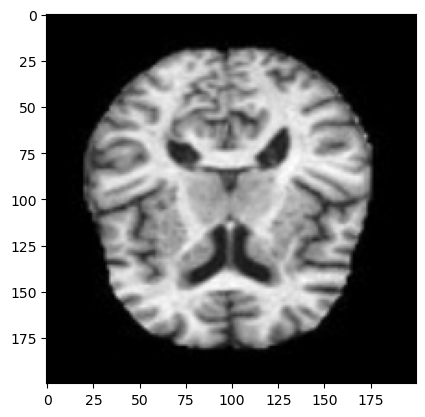

In [86]:
plt.imshow(X[0], cmap='gray')

### Prepare data

In [87]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(2288, 40000)

### Split Data

In [88]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [89]:
xtrain.shape, xtest.shape

((1830, 40000), (458, 40000))

### Feature Scaling

In [90]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


### Feature Selection: PCA

In [91]:
from sklearn.decomposition import PCA

In [92]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(1830, 40000) (458, 40000)


In [21]:
# print(pca_train.shape, pca_test.shape)
# print(pca.n_components_)
# print(pca.n_features_)

### Train Model

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [94]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)


LogisticRegression(C=0.1)

In [95]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

### Evaluation

In [96]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.982532751091703


In [97]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9868852459016394
Testing Score: 0.9759825327510917


### Prediction

In [98]:
pred = lg.predict(xtest)


In [99]:
misclassified=np.where(ytest!=pred)
misclassified

(array([ 47,  59, 271, 329, 335, 341, 365, 448]),)

In [100]:
print("Total Misclassified Samples: ",len(misclassified[0]))
#print(pred[36],ytest[36])

Total Misclassified Samples:  8


### TEST MODEL

In [101]:
dec = {0:'No Disease', 1:'Positive Tumor', 2:'Positive Alzheimer'}

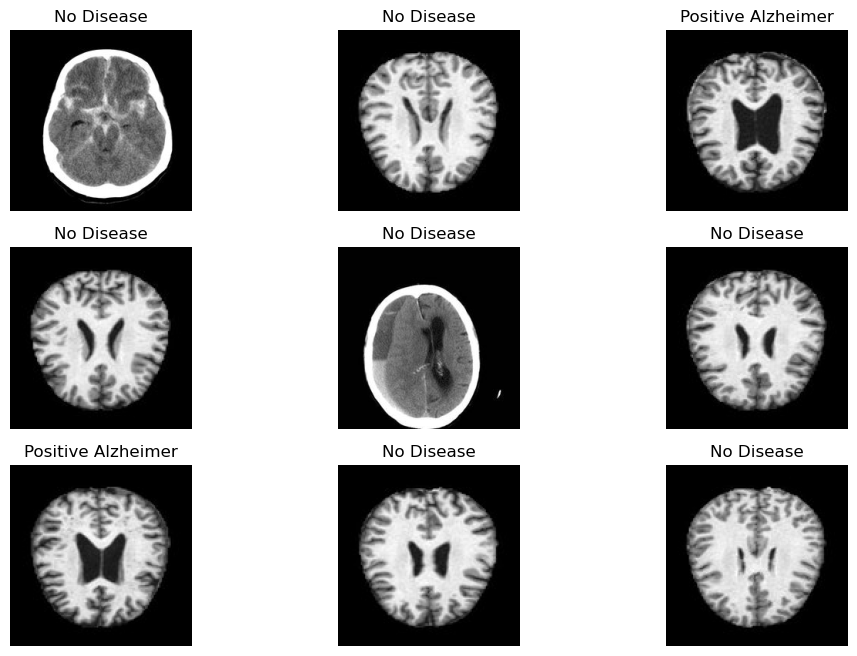

In [102]:
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/no_disease/')[9:18]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('brain_tumor/Testing/no_disease/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = lg.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1
   

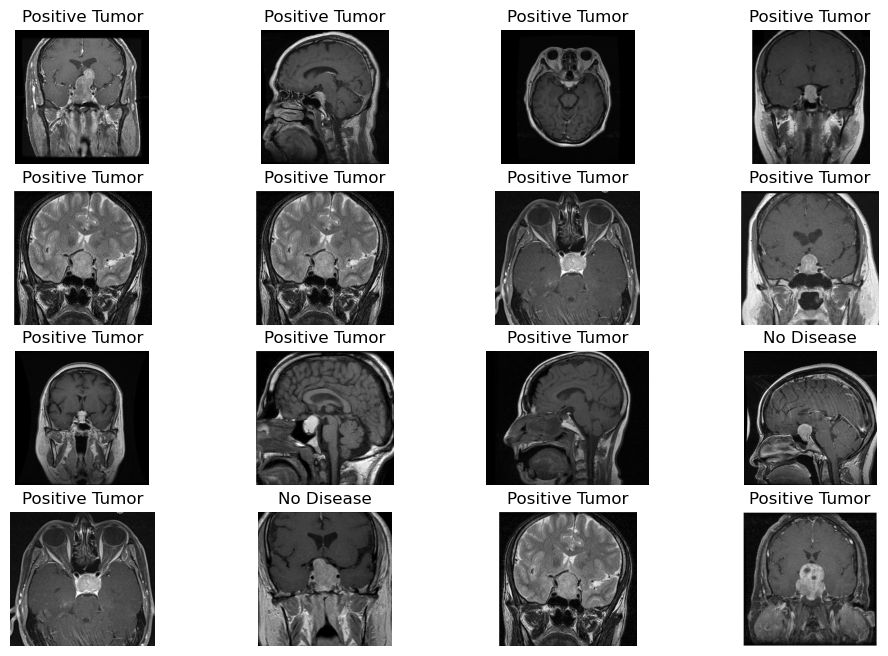

In [103]:
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('brain_tumor/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = lg.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

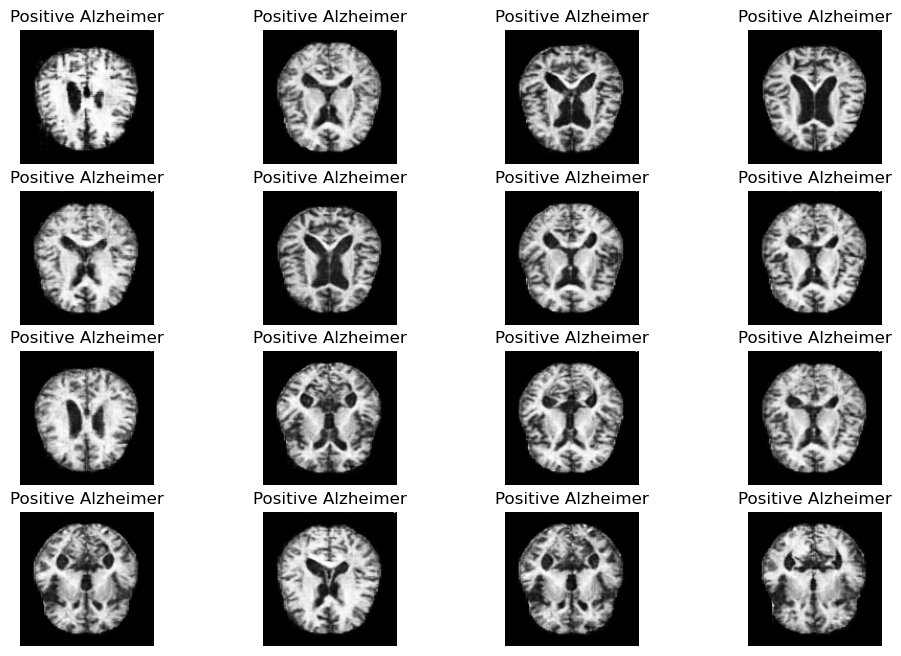

In [104]:
plt.figure(figsize=(12,8))
p = os.listdir('brain_tumor/Testing/')
c=1
for i in os.listdir('brain_tumor/Testing/moderate_test/')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread('brain_tumor/Testing/moderate_test/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = lg.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1